In [1]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
# 1. Model definition (must match your training)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = efficientnet_b3(weights=EfficientNet_B3_Weights.DEFAULT)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 2)
)
model = model.to(device)

In [3]:
# 2. Load trained weights
model.load_state_dict(torch.load('efficientnet_gender_classifier.pth', map_location=device))
model.eval()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13780\2236859360.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('efficientnet_gender_class

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
# 3. Define transforms 
image_size = (224, 224)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
val_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
class_names = ['female', 'male']  


In [8]:
# 4. Prediction and display function
def predict_and_show_image(image_path, model, device, transform, class_names):
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img_tensor)
        _, pred = torch.max(output, 1)
    plt.imshow(img)
    plt.title(f'Predicted: {class_names[pred.item()]}')
    plt.axis('off')
    plt.show()
    return class_names[pred.item()]


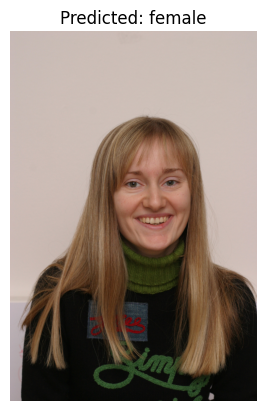

Predicted class: female


In [ ]:
image_path = r'D:\Comys_Hackathon5\dataset\Task_A\train\female\007_frontal.jpg'  
result = predict_and_show_image(image_path, model, device, val_transforms, class_names)
print("Predicted class:", result)

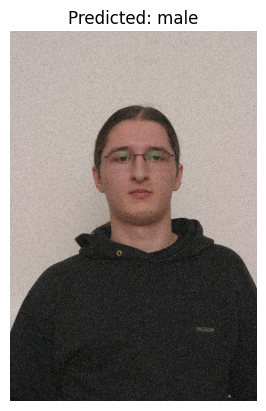

Predicted class: male


In [ ]:
image_path = r'D:\Comys_Hackathon5\dataset\Task_B\train\002_frontal\distortion\002_frontal_noisy.jpg'  
result = predict_and_show_image(image_path, model, device, val_transforms, class_names)
print("Predicted class:", result)

In [ ]:
D:\Comys_Hackathon5\Testing_images\image2.jpg

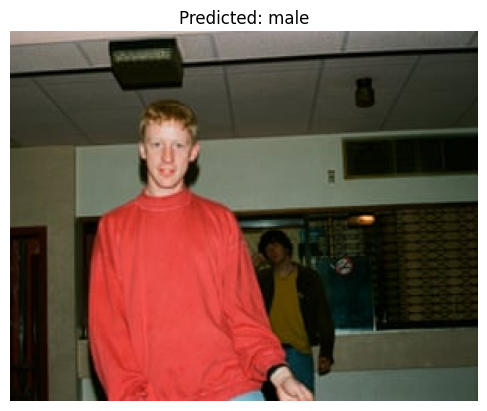

Predicted class: male


In [ ]:
image_path = r'D:\Comys_Hackathon5\Testing_images\image1.jpg'  
result = predict_and_show_image(image_path, model, device, val_transforms, class_names)
print("Predicted class:", result)

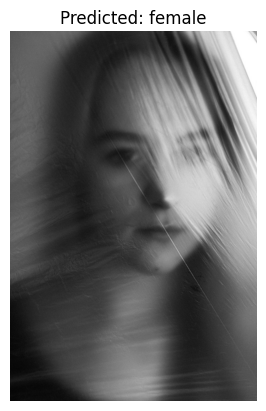

Predicted class: female


In [14]:
image_path = r'D:\Comys_Hackathon5\Testing_images\image2.jpg'  
result = predict_and_show_image(image_path, model, device, val_transforms, class_names)
print("Predicted class:", result)